# Circuit CS_R2CL

In [3]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import math 
import dpsimpy

#%matplotlib widget

## DPsim EMT

In [4]:
# DPsim EMT simulation
name = 'EMT_CS_R2CL'

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode('n1')
n2 = dpsimpy.emt.SimNode('n2')

# initialize node voltages as in modelica
n1.set_initial_voltage(complex(6.26676, -2.13813) * math.sqrt(3))
n2.set_initial_voltage(complex(-0.539123, 0.42205) * math.sqrt(3))

# Components
cs = dpsimpy.emt.ph1.CurrentSource('cs')
cs.I_ref = complex(10, 0)
cs.f_src = 50
r1 = dpsimpy.emt.ph1.Resistor('r_1', dpsimpy.LogLevel.off)
r1.R = 1
c1 = dpsimpy.emt.ph1.Capacitor('c_1', dpsimpy.LogLevel.off)
c1.C = 0.001
l1 = dpsimpy.emt.ph1.Inductor('l_1', dpsimpy.LogLevel.off)
l1.L = 0.001
r2 = dpsimpy.emt.ph1.Resistor('r_2')
r2.R = 1

# Connections
cs.connect([gnd, n1])
r1.connect([gnd, n1])
c1.connect([n2, n1])
l1.connect([gnd, n2])
r2.connect([gnd, n2])

# Define system topology
system = dpsimpy.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2])

# Logging
logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1)
logger.log_attribute('n2.v', 'v', n2)
logger.log_attribute('cs.i_intf', 'i_intf', cs)
logger.log_attribute('c_1.i_intf', 'i_intf', c1)
logger.log_attribute('l_1.i_intf', 'i_intf', l1)

sim = dpsimpy.Simulation(name)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_system(system)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)

In [5]:
sim.add_logger(logger)

In [6]:
sim.run()

[17:12:21.869805 MnaSolverFactory info] creating SparseLUAdapter solver implementation


In [7]:
# read EMT results
work_dir = 'logs/'
log_name = 'EMT_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/EMT_CS_R2CL.csv
column number: 4
results length: 1000
real column names: ['c_1.i_intf', 'cs.i_intf', 'n1.v', 'n2.v']
complex column names: []


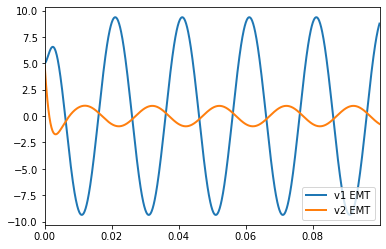

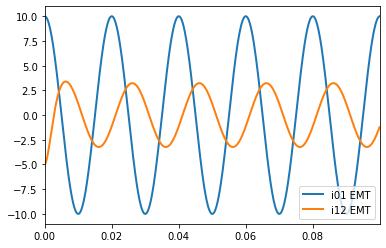

In [8]:
v1_emt = 'n1.v'
v2_emt = 'n2.v'
ic1_emt = 'c_1.i_intf'
il1_emt = 'l_1.i_intf'

ts_dpsim_emt[v1_emt].label = 'v1 EMT'
ts_dpsim_emt[v2_emt].label = 'v2 EMT'
ts_dpsim_emt[ic1_emt].label = 'ic1 EMT'
ts_dpsim_emt[il1_emt].label = 'il1 EMT'
pt.plot_timeseries(1, ts_dpsim_emt[v1_emt])
pt.plot_timeseries(1, ts_dpsim_emt[v2_emt])
pt.plot_timeseries(2, ts_dpsim_emt[ic1_emt])
pt.plot_timeseries(2, ts_dpsim_emt[il1_emt])

## DPsim DP

In [9]:
# DPsim DP simulation
name = 'DP_CS_R2CL'

# Nodes
gnd = dpsimpy.dp.SimNode.gnd
n1 = dpsimpy.dp.SimNode('n1')
n2 = dpsimpy.dp.SimNode('n2')

# initialize node voltages as in simulunk
n1.set_initial_voltage(complex(6.26676, -2.13813) * math.sqrt(2))
n2.set_initial_voltage(complex(-0.539123, 0.42205) * math.sqrt(2))

# Components
cs = dpsimpy.dp.ph1.CurrentSource('cs')
cs.I_ref = complex(10,0)
r1 = dpsimpy.dp.ph1.Resistor('r_1')
r1.R = 1
c1 = dpsimpy.dp.ph1.Capacitor('c_1')
c1.C = 0.001
l1 = dpsimpy.dp.ph1.Inductor('l_1')
l1.L = 0.001
r2 = dpsimpy.dp.ph1.Resistor('r_2')
r2.R = 1

# Connections
cs.connect([gnd, n1])
r1.connect([gnd, n1])
c1.connect([n2, n1])
l1.connect([gnd, n2])
r2.connect([gnd, n2])

# Define system topology
system = dpsimpy.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2])

# Logging
logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1)
logger.log_attribute('n2.v', 'v', n2)
logger.log_attribute('cs.i_intf', 'i_intf', cs)
logger.log_attribute('c_1.i_intf', 'i_intf', c1)
logger.log_attribute('l_1.i_intf', 'i_intf', l1)

sim = dpsimpy.Simulation(name)
sim.set_system(system)
sim.set_domain(dpsimpy.Domain.DP)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)

In [10]:
sim.add_logger(logger)

In [11]:
sim.run()

[17:12:22.352350 MnaSolverFactory info] creating SparseLUAdapter solver implementation


In [12]:
# read DP results
work_dir = 'logs/'
log_name = 'DP_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

#convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

logs/DP_CS_R2CL.csv
column number: 4
results length: 1000
real column names: []
complex column names: ['c_1.i_intf', 'cs.i_intf', 'n1.v', 'n2.v']


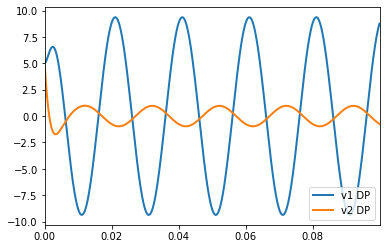

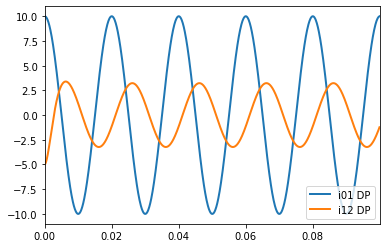

In [13]:
v1_dp = 'n1.v_shift'
v2_dp = 'n2.v_shift'
ic1_dp = 'c_1.i_intf_shift'
il1_dp = 'l_1.i_intf_shift'

ts_dpsim_dp_emt[v1_dp].label = 'v1 DP'
ts_dpsim_dp_emt[v2_dp].label = 'v2 DP'
ts_dpsim_dp_emt[ic1_dp].label = 'ic1 DP'
ts_dpsim_dp_emt[il1_dp].label = 'il1 DP'
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1_dp])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v2_dp])
pt.plot_timeseries(2, ts_dpsim_dp_emt[ic1_dp])
pt.plot_timeseries(2, ts_dpsim_dp_emt[il1_dp])

## Modelica reference results

In [14]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://raw.githubusercontent.com/dpsim-simulator/reference-results/62d774a31d40663368487e2751f93ed3ee53139d/Modelica/BasicGrids/CS_R2CL_Modelica.csv'
local_file = 'reference-results/CS_R2CL_Modelica.csv'
urllib.request.urlretrieve(url, local_file) 

ts_mod = rt.read_timeseries_simulink(local_file)

column number: 4
results length: 1001
real column names: ['v1', 'v2', 'i12', 'i34']
complex column names: []


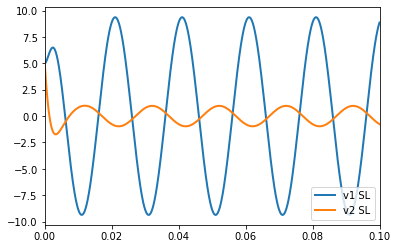

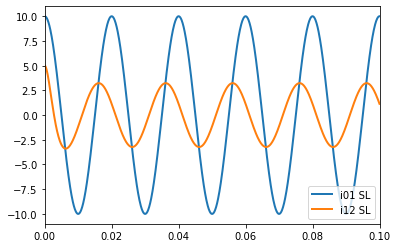

In [15]:
v1_mod = 'capacitor.v1'
v2_mod = 'capacitor.v2'
ic1_mod = 'capacitor.i'
il1_mod = 'inductor.i'

ts_mod[v1_mod].label = 'v1 Mod'
ts_mod[v2_mod].label = 'v2 Mod'
ts_mod[ic1_mod].label = 'ic1 Mod'
ts_mod[il1_mod].label = 'il1 Mod'
pt.plot_timeseries(1, ts_mod[v1_mod])
pt.plot_timeseries(1, ts_mod[v2_mod])
pt.plot_timeseries(2, ts_mod[ic1_mod])
pt.plot_timeseries(2, ts_mod[il1_mod])

## Comparison

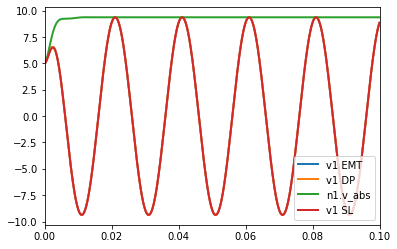

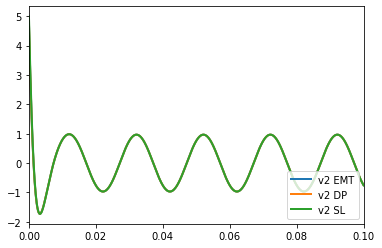

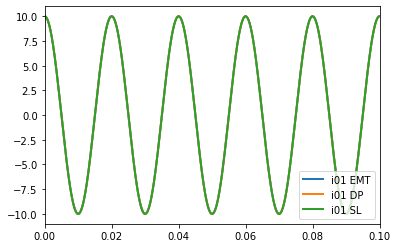

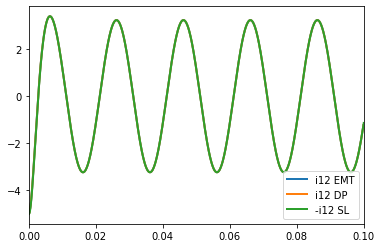

In [16]:
v1_emt = 'n1.v'
v2_emt = 'n2.v'

# plot v1
pt.plot_timeseries(1, ts_dpsim_emt[v1_emt])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1_dp])
pt.plot_timeseries(1, ts_dpsim_dp['n1.v'].abs())
pt.plot_timeseries(1, ts_mod[v1_mod])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt[v2_emt])
pt.plot_timeseries(2, ts_dpsim_dp_emt[v2_dp])
pt.plot_timeseries(2, ts_mod[v2_mod])
# plot ic1
pt.plot_timeseries(5, ts_dpsim_emt[ic1_emt])
pt.plot_timeseries(5, ts_dpsim_dp_emt[ic1_dp])
pt.plot_timeseries(5, ts_mod[ic1_mod])
# plot il1
pt.plot_timeseries(6, ts_dpsim_emt[il1_emt])
pt.plot_timeseries(6, ts_dpsim_dp_emt[il1_dp])
pt.plot_timeseries(6, ts_mod[il1_mod])

In [17]:
# calculate the RMSE between Modelica (ts_sl) and EMT (ts_dpsim_emt)
err_mod_emt = 0
err_mod_emt += ts.rmse(ts_mod[v1_mod], ts_dpsim_emt[v1_emt])
err_mod_emt += ts.rmse(ts_mod[v2_mod], ts_dpsim_emt[v2_emt])
err_mod_emt = err_mod_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_mod_emt))

# calculate the RMSE between Modelica (ts_sl) and DP (ts_dpsim_dp_emt)
err_mod_dp = 0
err_mod_dp += ts.rmse(ts_mod[v1_mod], ts_dpsim_dp_emt[v1_dp])
err_mod_dp += ts.rmse(ts_mod[v2_mod], ts_dpsim_dp_emt[v2_dp])
err_mod_dp = err_mod_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_mod_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.0172653
Total RMSE of Simulink reference and DPsim DP: 0.0172617


In [18]:
assert err_mod_emt < 0.00017
assert err_mod_dp < 2.26e-06